Date: Wednesday October 21, 2015, University of Minnesota

# Dynamic Laffer curves and Monetarist Arithmetic

Deterministic Model is a downward sloping money demand and a government budget constraint:
\begin{align*}
\frac{M_t}{p_t} =& \gamma_1 - \gamma_2 \frac{p_{t+1}}{p_t}\\
M_t  =& M_{t-1} + p_t \ d_t
\end{align*}
where $\gamma_1, \gamma_2 > 0$ and $d$ denotes the (constant) exogenous real deficit financed by money creation (seignorage).

Initial condition at $t = 0$ is $M_{-1} = 100$.

Definition: An equilibrium is a pair of positive sequences $(p_t, M_t)_{t=0}^\infty$ that satisfy both the money demand and the government budget constraint for $t \geq 0$ given $M_{-1}$.

a) Solution to the economy:

Substituting the government budget constraint in the money demand equation gives:
\begin{equation*}
M_{t-1} + p_t \ d_t =\gamma_1 p_t - \gamma_2 p_{t+1}
\end{equation*}

For any $p_0 \geq 0$, given $M_{-1}$ there is an equilibrium $(p_t, M_t)_{t\geq 0}$ computed by induction starting at $t=0$:
\begin{align*}
p_{t+1} &= \frac{1}{\gamma_2} \left((\gamma_1 - d_t) p_t - M_{t-1} \right)\\
M_t  =& M_{t-1} + p_t \ d_t
\end{align*}

We now write the model as a system of difference equation in matrix forms:
\begin{equation*}
\left[
\begin{array}{cc}
M_t\\
p_{t+1}
\end{array}
\right]
=
\left[
\begin{array}{cc}
1 & d_t\\
-\frac{1}{\gamma_2} & \frac{1}{\gamma_2} (\gamma_1 - d_t)
\end{array}
\right]
\cdot
\left[
\begin{array}{cc}
M_{t-1}\\
p_{t}
\end{array}
\right]
\end{equation*}
which we express as 
\begin{equation*}
x_{t+1} = L x_t .
\end{equation*}

As we will see below, $L$ is not simplectic but $L_s \equiv \frac{1}{\sqrt(2)} \cdot L$ is symplectic.
\begin{equation*}
x_{t+1} = \sqrt(2) \cdot  L_s x_t .
\end{equation*}

The symplectic matrix $L_s$ is decomposed into $V W V^{-1}$ with eigenvalues in the diagonal of $W$ where $W_{11} < 1$ and $W_{22} > 1$, $W_{21} = 0$.

Therefore the difference equation can be written:
\begin{equation*}
x_{t+1} = \sqrt(2) \cdot  V W V^{-1} x_t
\end{equation*}
which can be solved by induction:
\begin{equation*}
\left[
\begin{array}{cc}
M_{t-1} \\
p_{t}
\end{array}
\right]
= \sqrt(2)^t \cdot  V 
\left[
\begin{array}{cc}
W_{11}^t & W_{12, t}\\
0 & W_{22}^t
\end{array}
\right]
V^{-1}
\left[
\begin{array}{cc}
M_{-1}\\
p_{0}
\end{array}
\right]
\end{equation*}
where $W_{12, t} = W_{11}^{t-1} W_{12, t-1} + W_{12, t-1} W_{22}^t$.

and 

\begin{equation*}
V^{-1} \cdot\left[
\begin{array}{cc}
M_{t-1} \\
p_{t}
\end{array}
\right]
= \sqrt(2)^t \cdot 
\left[
\begin{array}{cc}
W_{11}^t & W_{12, t}\\
0 & W_{22}^t
\end{array}
\right]
V^{-1}
\left[
\begin{array}{cc}
M_{-1} \\
p_{0}
\end{array}
\right]
\end{equation*}

The state was chosen to be $[M_{t-1}, p_t]$ and not $[p_t, M_{t-1}]$ so that the Schur decomposition gives $W_{22} > 1$ and it is now clear that a stability condition for the system is that the lower entry of $V^{-1} [M_{-1}, p_0]$ be equal to zero. 

Above this stability condition, the system will diverge in the positive while below it will diverge in the negative.

Denote $V^{-1} = [[V^{11}, V^{12}], [V^{21}, V^{22}]$. The lowest initial condition $p_0$ consistent with an equilibrium is the solution to $V^{21} M_{-1} + V^{22} p_0 = 0$.

That is, it is
\begin{align*}
p_0^* \equiv - \frac{V^{21}}{V^{22}} M_{-1}
\end{align*}

Computer program to solve this economy:

In [1]:
#from __future__ import division  # Omit for Python 3.x
from scipy import linalg
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

# == Functions to solve Monetarist Arithmetic ==
def NextPM(gamma_1, gamma_2, d, p_0, M_past):
    '''
    Computes P_t+1 the next period's price level and M_t this period's money supply for Monetarist Arithmetic
        M_t/p_t = \gamma_1 - \gamma_2 p_{t+1}/p_t 
        M_t  = M_{t-1} + p_t d_t
    gamma_1 = money demand with zero expected inflation
    gamma_2 = sensitivity of money demand to the inflation tax
    d = real seignorage need
    p_0 = current price level
    M_past = past level of money
    '''
    p_prime = (1/gamma_2) * ((gamma_1 - d) * p_0 - M_past)
    M = M_past + p_0 * d
    return p_prime, M

def DeterministicMonetArit(T, gamma_1, gamma_2, d, p_0, init_M):
    '''
    Computes time series of length T for M and P for the monetarist arithmetic:
        M_t/p_t = \gamma_1 - \gamma_2 p_{t+1}/p_t 
        M_t  = M_{t-1} + p_t d_t
    NOTE: returns: [p_0, \ldots, p_T] and [M_{-1}, ldots, M_{T-1}]
    gamma_1 = money demand with zero expected inflation
    gamma_2 = sensitivity of money demand to the inflation tax
    d = sequence of real seignorage needs for T periods
    p_0 = initial price level
    M_past = inital level of money
    '''
    P = np.empty(T)
    M = np.empty(T)
    P[0] = p_0
    M[0] = init_M
    for i in range(T-1):
        P[i+1], M[i+1] = NextPM(gamma_1, gamma_2, d[i], P[i], M[i])
    return P, M

def DeterministicConstantMMonetArit(T, gamma_1, d, p_0, init_M):
    '''
    Computes time series of length T for M and P for the monetarist arithmetic:
        M_t/p_t = \gamma_1
        M_t  = M_{t-1} + p_t d_t
    gamma_1 = money demand with zero expected inflation
    d = sequence of real seignorage needs for T periods
    p_0 = initial price level
    M_past = inital level of money
    '''
    P = np.empty(T)
    M = np.empty(T)
    for i in range(T):
        P[i] = 1/(gamma_1 - d[i]) * init_M
        M[i] = init_M + P[i] * d[i]
        init_M = M[i]
    return P, M


def GrowthRate(p):
    '''
    Returns a vector of length ((length of vector p) - 1) with
    the gross growth rate p_{t+1}/p_t and the net growth rate inflation tax (p_{t+1} - p_t)/p_t = (p_{t+1}/p_t) - 1
    p: vector of prices
    '''
    T = len(p)
    GrowthRate = np.empty(T-1)
    for i in range(T-1):
        GrowthRate[i] = p[i+1] / p[i]
    return GrowthRate

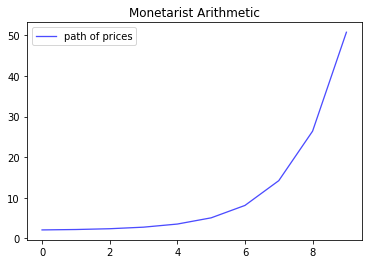

[ 2.1         2.1979      2.3915021   2.7763148   3.54316388  5.07331888
  8.12855555 14.23090035 26.42135905 50.77585509]


(None, 'prices')

In [2]:
'''
Parameters
'''
T = 10
gamma_1 = 100
gamma_2 = 50
d = 0.05
init_M = 100
d = d * np.ones(T) # generate a sequence of constant seignorage needs
epsilon = 10

p_0 = 2.1
#(gamma_2 /(gamma_1 - d[0] - gamma_2)) * init_M - epsilon

P, M = DeterministicMonetArit(T, gamma_1, gamma_2, d, p_0, init_M)

fig, ax = plt.subplots()
x = range(T)
ax.plot(x, P, 'b-', linewidth=1.3, label='path of prices', alpha=0.7)
ax.legend(loc='upper left')
ax.set_title('Monetarist Arithmetic')
plt.show()

print (P), 'prices'

b) Argue that 
- the equilibrium is indeterminate: there is a continuum of equilibria parametrized by the inital price level $p_0$.
- there is a minimum $p_0$ such that an equilibrium exists.


Answer: There is a continuum of equilibria parametrized by $p_0$: for any $p_0 \geq p_0^*$, the equilibrium can be computed by induction as above. If $p_0 < p_0^*$, then no equilibrium exists because the path of prices becomes negative which is inconsistent with the definition of equilibrium.

In [3]:
'''
Note that (1/np.sqrt(2)) * L is symplectic.
'''
L = np.array([[ 1, d[0]],
              [-(1/gamma_2), (1/gamma_2) * (gamma_1 - d[0])]])
L_s = (1/np.sqrt(2)) * L
J = np.array([[0, -1],
             [1, 0]])
print (np.dot(np.dot(L, J), L.T)), 'L J L.T'
print (np.dot(np.dot(L_s, J), L_s.T)), 'L_s J L_s.T'

[[ 0. -2.]
 [ 2.  0.]]
[[ 0. -1.]
 [ 1.  0.]]


(None, 'L_s J L_s.T')

In [4]:
# == Obtain Schur or Eigenvalue decomposition of L_s into V [[W_11, W_12],[0, W_22]] V^{-1} ==
W, V = linalg.schur(L_s)
print (W), 'W'
print (np.linalg.eigvals(L_s)), 'eigenvalues of L_s'

print (V), 'V'
print (np.linalg.inv(V)), 'invV'

print (M), 'M'
print (np.dot(V, np.dot(W, np.linalg.inv(V)))), 'V W V^-1'

[[0.70781531 0.04949747]
 [0.         1.41279793]]
[0.70781531 1.41279793]
[[-0.99979926  0.0200361 ]
 [-0.0200361  -0.99979926]]
[[-0.99979926 -0.0200361 ]
 [ 0.0200361  -0.99979926]]
[100.         100.105      100.214895   100.3344701  100.47328584
 100.65044404 100.90410998 101.31053776 102.02208278 103.34315073]
[[ 0.70710678  0.03535534]
 [-0.01414214  1.41350646]]


(None, 'V W V^-1')

In [5]:
invV = np.linalg.inv(V)
p_0star = - (invV[1,0]/ invV[1,1]) * init_M

print (p_0star)

2.004012044180792


c) Claim: For any $p_0 > p_0^*$, the equilibrium gross inflation rate $\frac{p_{t+1}}{p_t}$ converges to the same value $\pi_\infty$. For $p_0 = p_0^*$ the equilibrium gross inflaiton rate is lower.

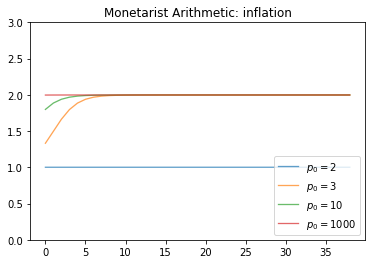

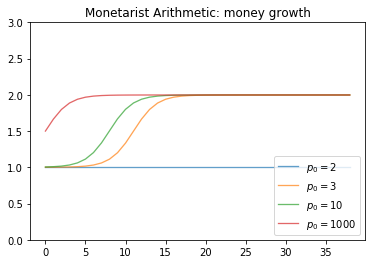

1.997997993977906
1.9979979939740038


(None, 'Asymptotic Money growth Rate')

In [6]:
'''
Parameters
'''
T = 40
gamma_1 = 100
gamma_2 = 50
d = 0.05
init_M = 100
d = d * np.ones(T) # generate a sequence of constant seignorage needs

fig, ax = plt.subplots()
fig, ax1 = plt.subplots()

'''
Main loop
'''
P_0 = np.array([p_0star, 3, 10, 1000])
for p_0 in P_0:
    P, M = DeterministicMonetArit(T, gamma_1, gamma_2, d, p_0, init_M)
    GrowthRateP = GrowthRate(P)
    GrowthRateM = GrowthRate(M)
    ax.plot(range(T-1), GrowthRateP, linewidth=1.3, label=r'$p_0=%d$' % p_0, alpha=0.7)
    ax1.plot(range(T-1), GrowthRateM, linewidth=1.3, label=r'$p_0=%d$' % p_0, alpha=0.7)
    ax.legend(loc='lower right')
    ax1.legend(loc='lower right')
    ax.set_title('Monetarist Arithmetic: inflation')
    ax1.set_title('Monetarist Arithmetic: money growth')
    ax.set_ylim(0, 3)
    ax1.set_ylim(0, 3)

plt.show()

print (GrowthRateP[T-2]), 'Asymptotic Gross Infaltion Rate'
print (GrowthRateM[T-2]), 'Asymptotic Money growth Rate'

d) Increase the constant real deficit financed by seignorage from 0.05 to 0.075. Compare the asymptotic inflation rate.

2.0 Asymptotic Gross Infaltion Rate $deficit=0.000000e+00$
1.9995999199519647 Asymptotic Gross Infaltion Rate $deficit=1.000000e-02$
1.9979979939779098 Asymptotic Gross Infaltion Rate $deficit=5.000000e-02$
1.996995479637937 Asymptotic Gross Infaltion Rate $deficit=7.500000e-02$
1.9633145138570272 Asymptotic Gross Infaltion Rate $deficit=9.000000e-01$


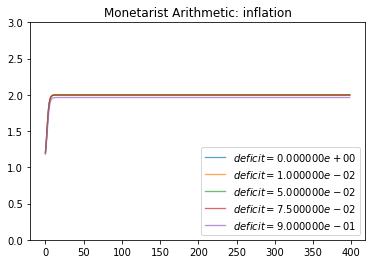

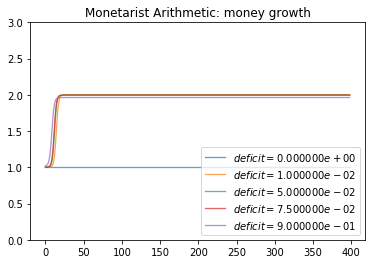

In [7]:
'''
Parameters
'''
T = 400
gamma_1 = 100
gamma_2 = 50
init_M = 100
p_0 = 2.5

fig, ax = plt.subplots()
fig, ax1 = plt.subplots()

D = np.array([0, 0.01, 0.05, 0.075, 0.9])

for e in D:
    d = e * np.ones(T)
    P, M = DeterministicMonetArit(T, gamma_1, gamma_2, d, p_0, init_M)
    GrowthRateP = GrowthRate(P)
    GrowthRateM = GrowthRate(M)
    ax.plot(range(T-1), GrowthRateP, linewidth=1.3, label=r'$deficit=%e$' % e, alpha=0.7)
    ax1.plot(range(T-1), GrowthRateM, linewidth=1.3, label=r'$deficit=%e$' % e, alpha=0.7)
    ax.legend(loc='lower right')
    ax1.legend(loc='lower right')
    ax.set_title('Monetarist Arithmetic: inflation')
    ax1.set_title('Monetarist Arithmetic: money growth')
    ax.set_ylim(0, 3)
    ax1.set_ylim(0, 3)
    print(GrowthRateP[T-2], 'Asymptotic Gross Infaltion Rate $deficit=%e$' % e)

plt.show()



This model generates a Laffer Cruve: see solution manual and Figure 9.5.1 p280 of Ljungqvist and Sargent.

The horizontal axis is the reciprocal of the gross inflation rate and the vertical axis is the seignorage earnings. Seignorage earnings as a function of the reciprocal of the gross inflation rate is a inverse U shape. Draw a horizontal line at the level of real deficit financed by seignorage $d$ to obtain the two equilibrium inflation rate: the high inflation rate (close to 0 because it measures the reciprocal) is stable and the low inflation rate (associated with $p_0^*$) is unstable. Increasing $d$ and the stable high inflation equilibrium decreases (moves to the right) while the unstable low inflation equilibrium increases (moves to the left).

# Numerical Exercise: 
#Monetarist Arithmetic based on Peruvian data

We now feed in seignorage needs for Peru (computed based on IMF IFS data) to the model of monetarist arithmetic with a downward money demand equation.

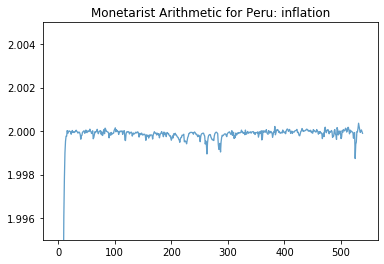

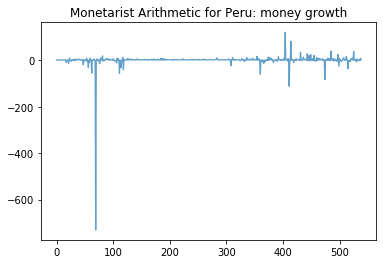

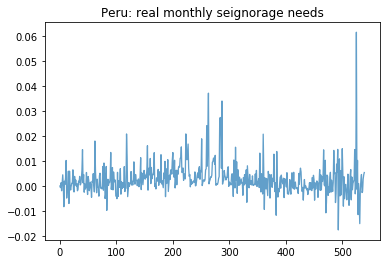

[1.99965576 1.99972157 2.00002222 1.99993719 2.00007043 2.00004197
 2.00000828 2.00004599 2.00013357 2.00009798 1.99995441 2.00002133
 2.0001655  2.00017083 2.00000712 1.99987222 2.00004703 1.99995162
 2.00000591 1.99998209 1.99995411 1.99992775 1.99967247 1.99989899
 1.99993434 1.99873771 1.99939388 1.99949249 1.99997497 1.99996794
 2.00012037 2.00036122 2.000208   2.00005871 1.99993764 2.00002127
 2.0000538  1.99997256 1.99989773]


(None, 'Gross Inflation rate for months 500 and after')

In [11]:
#Seignorage from Peru

df = pd.read_csv('/Users/guillaumesublet/OneDrive - Universite de Montreal/Backup Sept 21 iCloud Drive/Economics/Computations/Python codes/Research projects/MonTran/Peruvian_Monthly_Seignorage_Pnda.csv')
d = df['d_peru'].tolist()

'''
Parameters
'''
T = len(d)
gamma_1 = 100
gamma_2 = 50
init_M = 100
p_0 = 2.5

fig, ax = plt.subplots()
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()


P, M = DeterministicMonetArit(T, gamma_1, gamma_2, d, p_0, init_M)
GrowthRateP = GrowthRate(P)
GrowthRateM = GrowthRate(M)
ax.plot(range(T-1), GrowthRateP, linewidth=1.3, alpha=0.7)
ax.set_ylim(1.995, 2.005)
ax2.plot(range(T), d, linewidth=1.3, alpha=0.7)
ax1.plot(range(T-1), GrowthRateM, linewidth=1.3, alpha=0.7)
ax.set_title('Monetarist Arithmetic for Peru: inflation')
ax1.set_title('Monetarist Arithmetic for Peru: money growth')
ax2.set_title('Peru: real monthly seignorage needs')
plt.show()

print(GrowthRateP[500:]), 'Gross Inflation rate for months 500 and after'

We now feed in seignorage needs from Peru (computed from IMF IFS data) to the model of monetarist arithmetic with a constant money demand equation.

Deterministic Model is a constant money demand and a government budget constraint:
\begin{align*}
\frac{M_t}{p_t} =& \gamma_1 \\
M_t  =& M_{t-1} + p_t \ d_t
\end{align*}
where $\gamma_1> 0$ and $d$ denotes the (constant) exogenous real deficit financed by money creation (seignorage).

Initial condition at $t = 0$ is $M_{-1} = 100$.

Solving the model:
\begin{align*}
p_t =& \frac{1}{\gamma_1 - d_t}  M_{t-1}\\
M_t  =& M_{t-1} + p_t \ d_t
\end{align*}

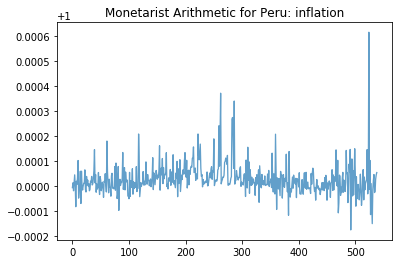

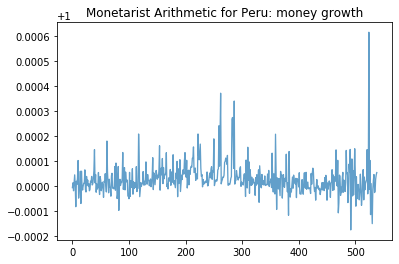

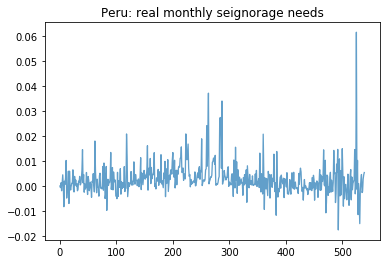

[1.00005314 0.99991928 1.00003696 0.99994908 0.99999662 1.00000635
 0.99997907 0.99994471 0.9999844  1.00004729 0.99997794 0.99992259
 0.99995596 1.00003914 1.00006567 0.99994454 1.00003595 0.99998495
 1.00001043 1.00001847 1.00002465 1.00014573 0.99996861 1.00000757
 1.00061511 0.99998729 1.00010219 0.99988562 1.00000977 0.9999318
 0.9998495  0.99998629 1.00002264 1.00004586 0.99997377 0.99997842
 1.00002717 1.00004428 1.00005373]


(None, 'Gross Inflation rate for months 500 and after')

In [12]:
#Seignorage from Peru
df = pd.read_csv('/Users/guillaumesublet/OneDrive - Universite de Montreal/Backup Sept 21 iCloud Drive/Economics/Computations/Python codes/Research projects/MonTran/Peruvian_Monthly_Seignorage_Pnda.csv')
d = df['d_peru'].tolist()

'''
Parameters
'''
T = len(d)
gamma_1 = 100
init_M = 100
p_0 = 2.5

fig, ax = plt.subplots()
fig, ax1 = plt.subplots()
fig, ax2 = plt.subplots()


P, M = DeterministicConstantMMonetArit(T, gamma_1, d, p_0, init_M)
GrowthRateP = GrowthRate(P)
GrowthRateM = GrowthRate(M)
ax.plot(range(T-1), GrowthRateP, linewidth=1.3, alpha=0.7)
#ax.set_ylim(1.995, 2.005)
ax2.plot(range(T), d, linewidth=1.3, alpha=0.7)
ax1.plot(range(T-1), GrowthRateM, linewidth=1.3, alpha=0.7)
ax.set_title('Monetarist Arithmetic for Peru: inflation')
ax1.set_title('Monetarist Arithmetic for Peru: money growth')
ax2.set_title('Peru: real monthly seignorage needs')
plt.show()

print(GrowthRateP[500:]), 'Gross Inflation rate for months 500 and after'